In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [27]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#print(cancer.DESCR)
X, t = load_breast_cancer(return_X_y=True)
#print(X)
#print(t)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [28]:
#split the set
from sklearn.model_selection import train_test_split
X_train, X_test, t_train, t_test = train_test_split(X, t, test_size = 1/5, random_state = 25)
#standardlize
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#print(X_train)
#print(t_train.shape)

[[ 3.67363478  0.61144803  3.66100904 ...  2.34437188 -0.09611405
  -0.17452236]
 [-1.32911335 -1.64698566 -1.31886818 ... -0.8324528  -0.74330911
  -0.35457983]
 [-0.96314126 -2.30080581 -0.97408857 ... -1.08225493 -1.31717664
  -0.39770039]
 ...
 [-0.94055039 -0.88539296 -0.90701401 ... -0.56496149 -0.53448509
   1.4092841 ]
 [-1.45957562 -0.09985081 -1.32991094 ... -0.02905594  0.34863329
   1.26360654]
 [ 0.55044702  0.53241483  0.5567656  ...  0.22782186  0.89858967
  -0.44431721]]


In [21]:
def recog_class(X_train,t_tain,class_num):
    i0 = np.asarray(np.nonzero(t_tain == class_num))
    [m,n] = i0.shape
    X_train_0 = np.zeros((n,30)) #store the rearranged x_train
    t_train_0 = np.zeros(n) #store the target
    t_train_0 += class_num
    for i in range(n):
        X_train_0[i,:] = X_train[i0[0,i],:]
    return X_train_0,t_train_0

def gradient_descent(alpha,X_train_2class,t_train_2class,iterations):
    m = len(X_train_2class)
    n = len(t_train_2class)
    new_col = np.ones(m)
    x1_train_2class = np.insert(X_train_2class,0,new_col,axis=1)
    w = np.ones(31)
    z = np.zeros(m)
    y = np.zeros(m)
    cost = np.zeros(iterations)
    for i in range (iterations):
        z = np.dot(x1_train_2class,w)
        y = 1/(1+np.exp(-z))
        diff = y - t_train_2class
        grad = np.dot(x1_train_2class.T,diff)
        grad = grad/m
        w = w - alpha*grad
        for j in range(m):
            cost[i] = cost[i] + (t_train_2class[j]*np.logaddexp(0,-z[j]) + (                        1-t_train_2class[j])*np.logaddexp(0,z[j]))
        cost[i] = cost[i]/m
    return w,cost,z,y


def outputPR(y1,t_train_2class):
    TN = 0
    TP = 0
    FP = 0
    FN = 0
    for i in range (len(y1)):
        if (y1[i] == 0 and t_train_2class[i] == 0):
            TN+=1
        if (y1[i] == 1 and t_train_2class[i] == 1):
            TP+=1
        if (y1[i] == 0 and t_train_2class[i] == 1):
            FN+=1
        if (y1[i] == 1 and t_train_2class[i] == 0):
            FP+=1
    
    miss_classification_rate = (FN+FP)/(TN+TP+FN+FP)
    precise = TP/(TP+FP)
    recall = TP/(TP+FN)
    F1_score = 2*precise*recall/(precise+recall)
    return precise,recall,miss_classification_rate,F1_score



In [22]:
X_train_class0,t_train_class0 = recog_class(X_train,t_train,0)
X_train_class1,t_train_class1 = recog_class(X_train,t_train,1)
X_test_class0,t_test_class0 = recog_class(X_test,t_test,0)
X_test_class1,t_test_class1 = recog_class(X_test,t_test,1)
#print(X_train_class1.shape)
X_train_2class = np.concatenate((X_train_class0,X_train_class1), axis=0) 
t_train_2class = np.concatenate((t_train_class0,t_train_class1), axis=0) 
X_test_2class = np.concatenate((X_test_class0,X_test_class1), axis=0) 
t_test_2class = np.concatenate((t_test_class0,t_test_class1), axis=0) 
#print(X_train_2class)
#print(t_train_2class)

In [23]:
#computer parameter
w,cost,z,y = gradient_descent(0.5,X_train_2class,t_train_2class,1000)
new_col = np.ones(len(X_test))
X1_test_2class = np.insert(X_test_2class,0,new_col,axis=1)
z_test = np.dot(X1_test_2class,w)
#print(z_test)
y_test = np.zeros(len(z_test))
for i in range(len(z_test)):
    if(z_test[i]>=0):
        y_test[i] = 1
#print(y_test) 
precise,recall,miss_classification_rate,F1_score = outputPR(y_test,t_test_2class)
#compute the result
print('Precise = ' + str(precise) + '\n')
print('Recall = ' + str(recall) + '\n')

print('The missclassification rate is :' + str(miss_classification_rate)+'\n')
print('The F1_score is: ' + str(F1_score) + '\n')
print(z_test.shape)
print(t_test_2class.shape)

Precise = 0.961038961038961

Recall = 0.9866666666666667

The missclassification rate is :0.03508771929824561

The F1_score is: 0.9736842105263157

(114,)
(114,)


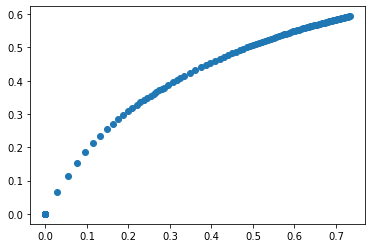

In [29]:
#comput PR Curve
def get_PR_curve(z_test):
    TP = 0
    TN = 0
    FN = 0
    FP = 0
    p_matrix = np.zeros(len(z_test))
    r_matrix = np.zeros(len(z_test))
    y_pr = np.zeros(len(z_test))
    for i in range(len(z_test)):
        for j in range (len(z_test)):
            if(z_test[i]>=z_test[j]):
                y_pr[j] = 1
        for k in range (len(z_test)):
            if (y_pr[k] == 0 and t_test_2class[k] == 0):
                TN+=1
            if (y_pr[k] == 1 and t_test_2class[k] == 1):
                TP+=1
            if (y_pr[k] ==1 and t_test_2class[k] == 0):
                FP +=1
            if (y_pr[k] == 0 and t_test_2class[k] == 1):
                FN +=1
        p = (TP)/(TP+FP)
        r = (TP)/(TP+FN)
        p_matrix[i] = p
        r_matrix[i] = r
    return p_matrix,r_matrix

p_matrix,r_matrix = get_PR_curve(z_test)
plt.scatter(r_matrix,p_matrix)

In [25]:
##Compute Prediction with scikit learn
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
X_sc, y_sc = load_breast_cancer(return_X_y = True)
clf = LogisticRegression(random_state=0,solver='liblinear',multi_class='auto').fit(X_train_2class, t_train_2class)
prediction = clf.predict(X_test_2class)
print(prediction)
#print("------------------------------------------------------")
#print(t_test)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]


In [26]:
print(t_test.shape)
precise1,recall1,miss_classification_rate1,F1_score1 = outputPR(prediction,t_test_2class)
print('Precise = ' + str(precise1) + '\n')
print('Recall = ' + str(recall1) + '\n')

print('The missclassification rate is :' + str(miss_classification_rate1)+'\n')
print('The F1_score is: ' + str(F1_score1) + '\n')


print(y_test)
print(prediction)

(114,)
Precise = 0.961038961038961

Recall = 0.9866666666666667

The missclassification rate is :0.03508771929824561

The F1_score is: 0.9736842105263157

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.]
